#### Agrupamento vagas

In [8]:
# Carregando as bibliotecas
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [4]:
# Carrega os datasets
# df_vagas = pd.read_csv('data/vagas-ba.csv', encoding='ISO-8859-1', sep=';')
df_vagas = pd.read_excel('data/vagas-pr.xlsx', index_col=0)
pd.set_option('max_colwidth', None)
df_vagas.head()

,cod_ocupacao,salario,tipo_contratacao,qtd_experiencia,escolaridade
0,514120,600,3,2,1
1,783215,812,3,3,1
2,142205,0,3,6,6
3,513205,1200,3,6,2
4,763215,1656,3,6,0


In [5]:
# verifica se existe variáveis nulas por campo
df_vagas.isna().sum()

cod_ocupacao        0
salario             0
tipo_contratacao    0
qtd_experiencia     0
escolaridade        0
dtype: int64

In [6]:
df_vagas.shape

(4045, 5)

In [10]:
# Considerando que o CBO está organizado em grupo e subgrupo de funções por área, então podemos propor um agrupamento por subgrupo até o nível 5
# Estrutura CBO2002 (Ex. 3143 - Técnicos em mecânica veicular):
#   - Grande grupo (1º número): 
#       - 3: Técnico de nível médio
#   - Subgrupo principal (2 primeiros números): 
#       - 31: Técnicos de nível médio das ciências físicas, químicas, engenharia e afins
#   - Subgrupo (3 primeiros números): 314
#       - 314: Técnicos em metalmecânica 
#   - Família (4 números)
#       - 3143: Técnicos em mecânica veicular
#   - Ocupação: (6 números)
#       - 314305: Técnico em automobilística
#       - 314310: Técnico mecânico (aeronaves) 
#       - 314315: Técnico mecânico (embarcações)    
# Fontes: http://www.mtecbo.gov.br/cbosite/pages/home.jsf, https://renastonline.ensp.fiocruz.br/temas/classificacao-brasileira-ocupacoes-cbo

Normalização dos dados

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(df_vagas)
X

array([[-0.43402256, -0.0275329 ,  0.13583077, -0.49586031, -0.50946169],
       [ 0.99170225, -0.02744163,  0.13583077, -0.13794544, -0.50946169],
       [-2.40451046, -0.02779122,  0.13583077,  0.93579919,  2.21498642],
       ...,
       [ 0.99694749, -0.02705932,  0.13583077, -1.21169006,  1.12520718],
       [-0.9214589 , -0.02720312,  0.13583077, -1.21169006, -1.05435132],
       [-0.42233998, -0.02779122,  0.13583077, -0.13794544,  1.12520718]])

Nº ótimo de clusters (parâmetro ***c*** abaixo) obtido no notebook avaliacao-hiperparametros: 6 - seis.

Demais parâmetros têm valor *default*

In [ ]:
r = fuzz.cmeans(data = X.T, c=6, m=2, error=0.005, maxiter=1000, init=None)
r

Cada linha de r guarda a probabilidade de pertencimento a cada um dos seis clusters passado como parâmetro.

Posição 1 da matriz indica as probabilidades de pertencimento ao cluster.

In [20]:
probabilidades_vagas = r[1]

<img src="img\soft-clustering.png" style="width:800px;height:300px;">

A base guarda 4045 vagas de emprego. Cada vaga é agrupada em um dos seis clusters passado como parâmetro. 
Na verdade, há um percentual indicando o grau de pertencimento da vaga a cada um dos seis clusters. Vide shape.

In [21]:
probabilidades_vagas.shape

(6, 4045)

In [22]:
probabilidades_vagas

array([[0.05447003, 0.04721009, 0.44428104, ..., 0.11217772, 0.02102728,
        0.31180067],
       [0.0706555 , 0.34483726, 0.08233185, ..., 0.12485208, 0.02424424,
        0.06871722],
       [0.09147069, 0.05388653, 0.18862878, ..., 0.28894844, 0.04350246,
        0.37909296],
       [0.10950239, 0.33002843, 0.06289068, ..., 0.2327941 , 0.05402213,
        0.05866698],
       [0.14907072, 0.11847753, 0.13234346, ..., 0.09838732, 0.04146011,
        0.10255566],
       [0.52483067, 0.10556015, 0.08952419, ..., 0.14284033, 0.81574377,
        0.0791665 ]])

In [25]:
probabilidades_vagas[0][0] * 100

5.447003188348763

In [26]:
probabilidades_vagas[1][0] * 100

7.065550356035972

In [28]:
probabilidades_vagas[2][0] * 100

9.147069036379534

In [29]:
probabilidades_vagas[3][0] * 100

10.950239023842197

In [30]:
probabilidades_vagas[4][0] * 100

14.90707177221909

In [31]:
probabilidades_vagas[5][0] * 100

52.483066623174444

probabilidades guarda a que cluster (identificados de 0  a 5) cada uma das vagas tem maior percentual de pertencimento

In [41]:
probabilidades = probabilidades_vagas.argmax(axis=0)
probabilidades

1

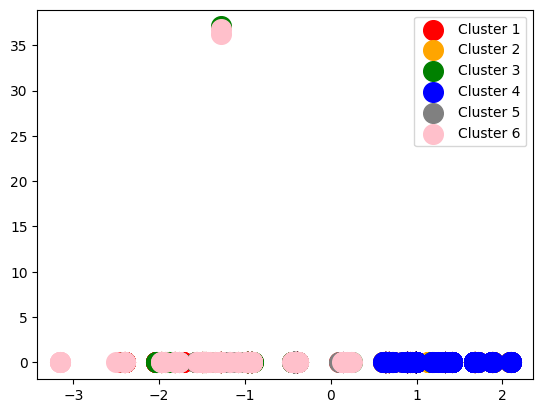

In [38]:
plt.scatter(X[probabilidades == 0, 0], X[probabilidades == 0, 1], s=200, c= 'red', label = 'Cluster 1')
plt.scatter(X[probabilidades == 1, 0], X[probabilidades == 1, 1], s=200, c= 'orange', label = 'Cluster 2')
plt.scatter(X[probabilidades == 2, 0], X[probabilidades == 2, 1], s=200, c= 'green', label = 'Cluster 3')
plt.scatter(X[probabilidades == 3, 0], X[probabilidades == 3, 1], s=200, c= 'blue', label = 'Cluster 4')
plt.scatter(X[probabilidades == 4, 0], X[probabilidades == 4, 1], s=200, c= 'gray', label = 'Cluster 5')
plt.scatter(X[probabilidades == 5, 0], X[probabilidades == 5, 1], s=200, c= 'pink', label = 'Cluster 6')
plt.legend()